In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's load the file and make some checks

In [3]:
df = pd.read_csv("churn.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [9]:
df.columns
print('Number of unique values in each column:')
for label in df.columns:
        print(f'{label}: {df[label].nunique()}')

Number of unique values in each column:
RowNumber: 10000
CustomerId: 10000
Surname: 2932
CreditScore: 460
Geography: 3
Gender: 2
Age: 70
Tenure: 11
Balance: 6382
NumOfProducts: 4
HasCrCard: 2
IsActiveMember: 2
EstimatedSalary: 9999
Exited: 2


Let's drop the RowNumber, CustomerId, Surname columns as they are irrelevant to the analysis

In [10]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The dataset is clean, let's see what columns are numerical vs categorical

In [12]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Categorical Columns: ['Geography', 'Gender']


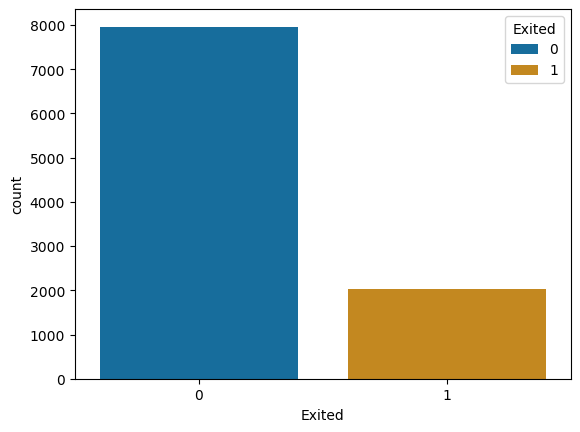

In [13]:
sns.countplot(data=df, x='Exited', palette = "colorblind", hue = "Exited");

Let's show the percentages 

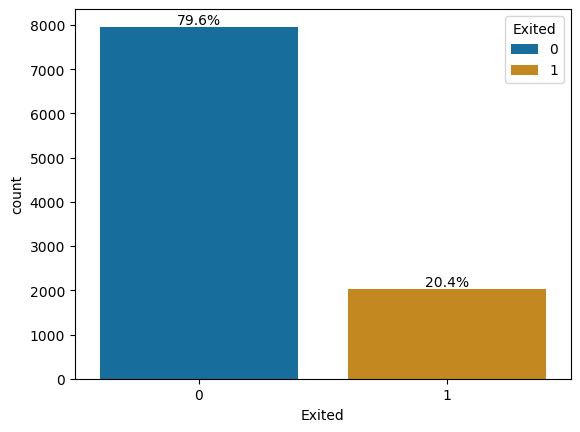

In [14]:
ax = sns.countplot(x='Exited', data=df, palette='colorblind', hue='Exited')

# get the total count of the type column
total = df['Exited'].count()

# annotate the bars 
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.show()


Text(0.5, 1.0, 'Activity and Churn')

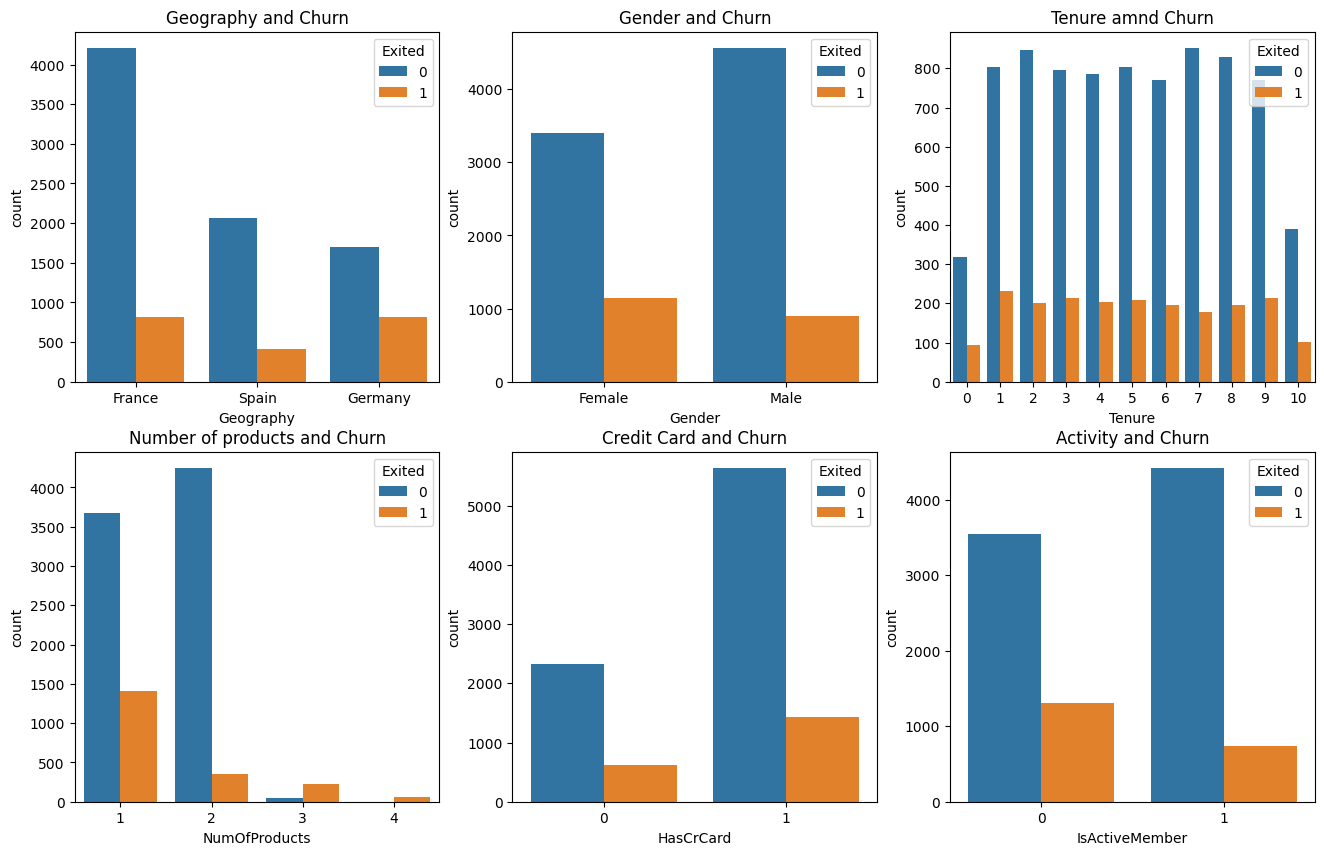

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))

sns.countplot(data=df, x='Geography', hue='Exited', ax=ax[0][0])
ax[0][0].set_title('Geography and Churn')
sns.countplot(data=df, x='Gender', hue='Exited', ax=ax[0][1])
ax[0][1].set_title('Gender and Churn')
sns.countplot(data=df, x='Tenure', hue='Exited', ax=ax[0][2])
ax[0][2].set_title('Tenure amnd Churn')
sns.countplot(data=df, x='NumOfProducts', hue='Exited', ax=ax[1][0])
ax[1][0].set_title('Number of products and Churn')
sns.countplot(data=df, x='HasCrCard', hue='Exited', ax=ax[1][1])
ax[1][1].set_title('Credit Card and Churn')
sns.countplot(data=df, x='IsActiveMember', hue='Exited', ax=ax[1][2]);
ax[1][2].set_title('Activity and Churn')

People with a smaller amount of Products and people that are not active members are more likely to churn

Let's create some histograms for the numeric values with a bigger range 

Text(0.5, 1.0, 'Estimated Salary Distribution by Churn')

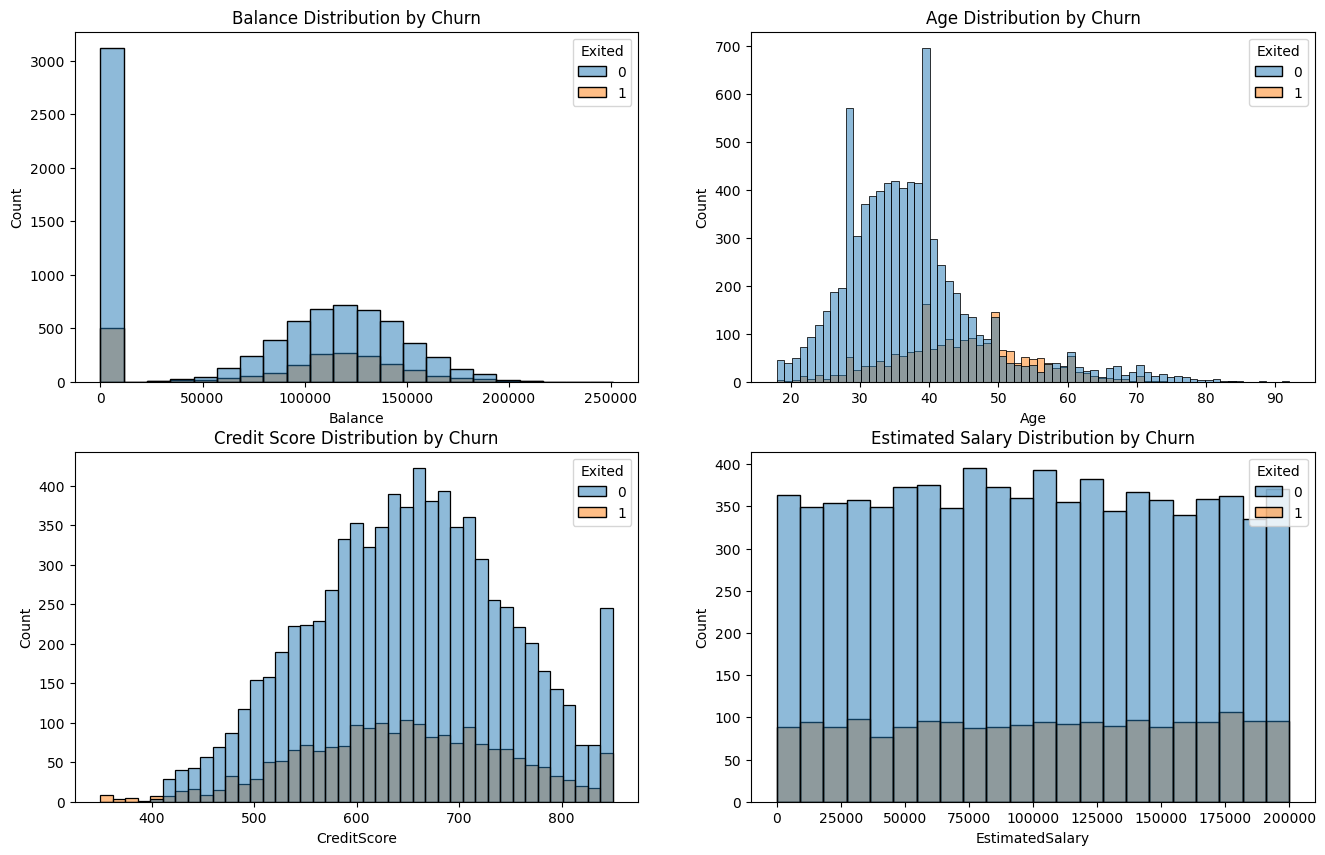

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

sns.histplot(data=df, x='Balance', hue='Exited', ax=ax[0][0])
ax[0][0].set_title('Balance Distribution by Churn')
sns.histplot(data=df, x='Age', hue='Exited', ax=ax[0][1])
ax[0][1].set_title('Age Distribution by Churn')
sns.histplot(data=df, x='CreditScore', hue='Exited', ax=ax[1][0])
ax[1][0].set_title('Credit Score Distribution by Churn')
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', ax=ax[1][1])
ax[1][1].set_title('Estimated Salary Distribution by Churn')

Customers with lower balance seem more likely to churn.
Age seems like a normal distribution as a percentage of churners with the center at 50 but most of the customers are under 40 years old.

In [17]:
df = pd.get_dummies(df, columns=["Geography"])
df["Gender"] = df["Gender"].map({'Female': 0, 'Male': 1})

In [18]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True


Since we have only three countries we can split them into three columns and make gender 0 for female and 1 for male

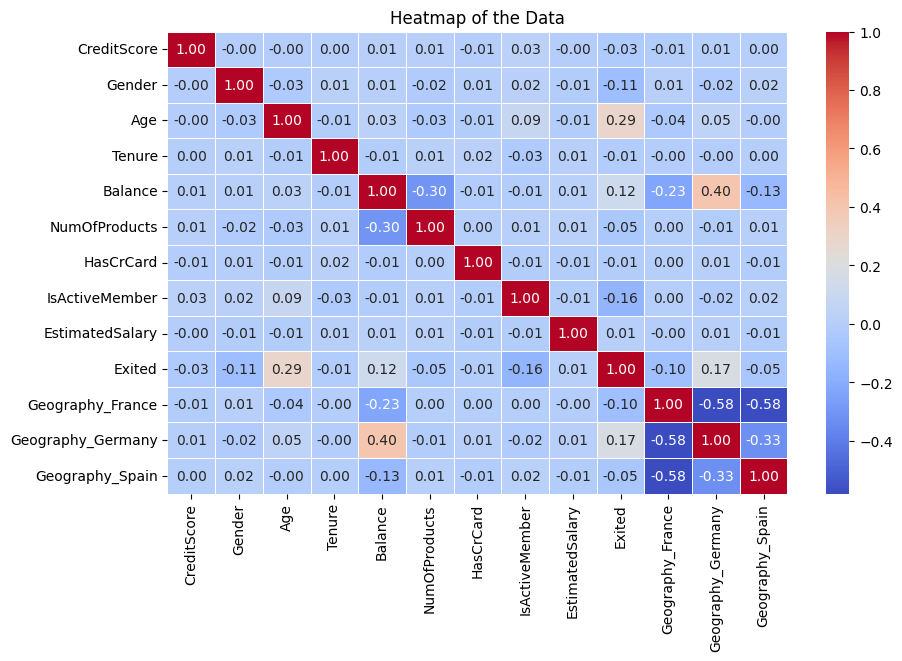

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of the Data')
plt.show()

In [20]:
corr_results = df.corrwith(df['Exited']).abs().sort_values(ascending=False)
corr_results

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
IsActiveMember       0.156128
Balance              0.118533
Gender               0.106512
Geography_France     0.104955
Geography_Spain      0.052667
NumOfProducts        0.047820
CreditScore          0.027094
Tenure               0.014001
EstimatedSalary      0.012097
HasCrCard            0.007138
dtype: float64

Age, IsActiveMember, Balance along with Gender and Geography seem to correlate.

Now let's try to do some feature engineering.

In [21]:
#Create a new dataframe and keeping the old one just in case.
df_enriched = df.copy()

Let's put Age, Credit score, balance and estimated salary into groups.
We could define our own ranges and it would be better from a business perspective as each group would be more meaningful and not based on statistics. For example ages 18-28,26-36 etc instead of using quantile bins but we will keep it like this for now.

In [22]:
df_enriched['Age_Groups'] = pd.qcut(df_enriched['Age'], 6, labels = [1, 2, 3, 4, 5, 6])
df_enriched["CreditsScore_Groups"] = pd.qcut(df_enriched['CreditScore'], 8, labels = [1, 2, 3, 4, 5, 6,7,8])
df_enriched["Balance_score_groups"] = pd.qcut(df_enriched['Balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5]) #rank needed because of many 0s
df_enriched["EstSalaryScore_groups"] = pd.qcut(df_enriched['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Let's create some more columns.

In [23]:
df_enriched["BalanceSalaryRatio"] = df_enriched["Balance"] / (df_enriched["EstimatedSalary"] + 1)
df_enriched['Customer_Lifetime_Percentage'] = (df_enriched['Tenure'] / df_enriched['Age']) * 100
df_enriched["HighSalary"] = (df_enriched["EstimatedSalary"] > df_enriched["EstimatedSalary"].median()).astype(int)

In [24]:
df_enriched.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Age_Groups,CreditsScore_Groups,Balance_score_groups,EstSalaryScore_groups,BalanceSalaryRatio,Customer_Lifetime_Percentage,HighSalary
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False,5,3,1,6,0.000000,4.761905,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True,4,3,3,6,0.744670,2.439024,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False,5,1,5,6,1.401362,19.047619,1
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False,4,6,1,5,0.000000,2.564103,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True,5,8,4,4,1.587035,4.651163,0


We know we have an imbalanced dataset - most customers are not exiting.

In [25]:
from sklearn.model_selection import train_test_split

X = df_enriched.drop('Exited', axis=1)
y = df_enriched['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

We could use class weights, like we do here, under sample the majority class or oversample the minority class.

Let's start training some models.

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

ROC-AUC: 0.8481756024128906


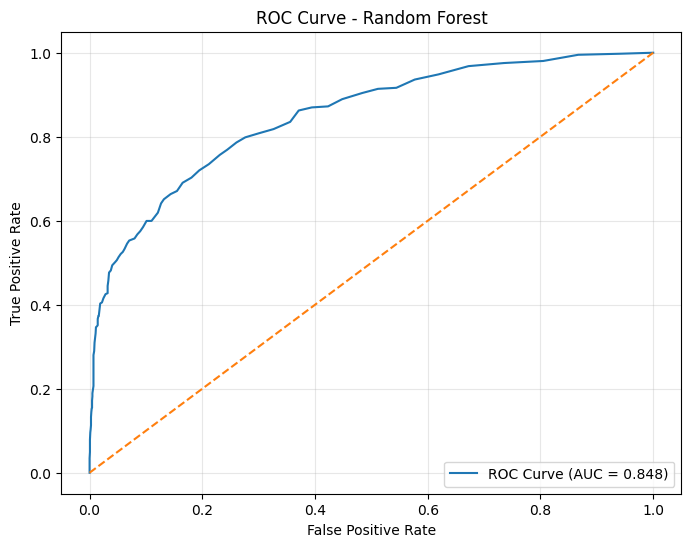

In [33]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

y_pred_rf = clf.predict(X_test)
y_proba_rf = clf.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

roc_auc_rf = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", roc_auc_rf)

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_rf:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,max_depth=3,random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,
                           random_state=42)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

ROC-AUC: 0.8696215475876493


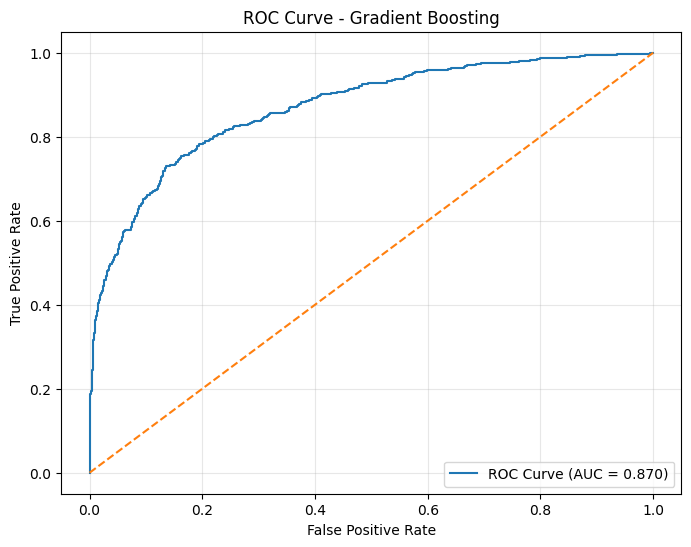

In [29]:
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_gb))
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
print("ROC-AUC:", roc_auc_gb)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

#ROC Curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_proba_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f"ROC Curve (AUC = {roc_auc_gb:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

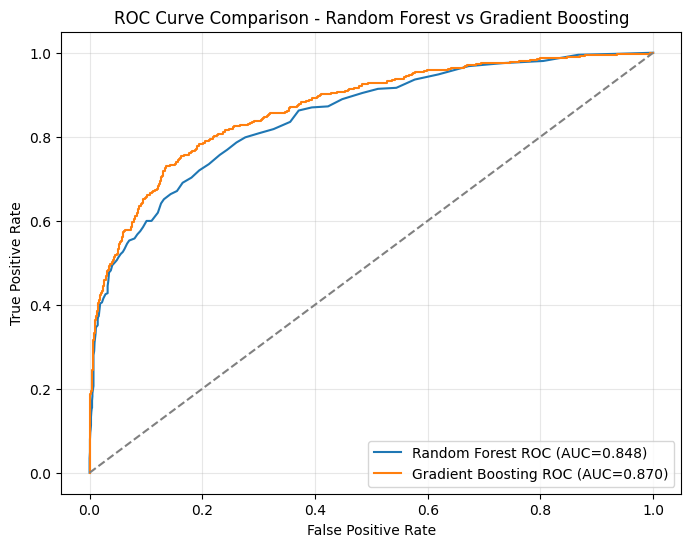

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest ROC (AUC={roc_auc_rf:.3f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting ROC (AUC={roc_auc_gb:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Random Forest vs Gradient Boosting")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [31]:
# Random Forest
fi_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': clf.feature_importances_}).sort_values('Importance', ascending=False)
# Gradient Boosting
fi_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': gb.feature_importances_}).sort_values('Importance', ascending=False)

print("=== Random Forest Feature Importance ===")
print(fi_rf.head(10))
print("\n=== Gradient Boosting Feature Importance ===")
print(fi_gb.head(10))

=== Random Forest Feature Importance ===
                         Feature  Importance
2                            Age    0.152178
5                  NumOfProducts    0.113706
8                EstimatedSalary    0.082700
4                        Balance    0.081986
12                    Age_Groups    0.081218
0                    CreditScore    0.080607
17  Customer_Lifetime_Percentage    0.076368
16            BalanceSalaryRatio    0.065976
3                         Tenure    0.043686
13           CreditsScore_Groups    0.038346

=== Gradient Boosting Feature Importance ===
                         Feature  Importance
2                            Age    0.368331
5                  NumOfProducts    0.285369
7                 IsActiveMember    0.110456
4                        Balance    0.071662
10             Geography_Germany    0.050774
16            BalanceSalaryRatio    0.029287
8                EstimatedSalary    0.023525
0                    CreditScore    0.021624
17  Customer_

Some of the same features seem to be important for both models.

Let's change our threshold - we want to maximize recall and catch as many churners as possible. False positives will increase but are a lot less important than not catching a churner.

In [34]:
from sklearn.metrics import precision_recall_fscore_support

def threshold_metrics(y_true, y_proba, thresholds):
    """
    Computes precision, recall, f1 for a range of probability thresholds.
    """
    results = []
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
        results.append((t, precision, recall, f1))
    return np.array(results)

# Define thresholds
thresholds = np.arange(0.1, 0.6, 0.05)

# Random Forest
rf_results = threshold_metrics(y_test, y_proba_rf, thresholds)

# Gradient Boosting
gb_results = threshold_metrics(y_test, y_proba_gb, thresholds)

# Display
print("=== Random Forest Threshold Optimization ===")
for t, p, r, f1 in rf_results:
    print(f"Threshold {t:.2f}: Precision={p:.3f}, Recall={r:.3f}, F1={f1:.3f}")

print("\n=== Gradient Boosting Threshold Optimization ===")
for t, p, r, f1 in gb_results:
    print(f"Threshold {t:.2f}: Precision={p:.3f}, Recall={r:.3f}, F1={f1:.3f}")


=== Random Forest Threshold Optimization ===
Threshold 0.10: Precision=0.323, Recall=0.904, F1=0.476
Threshold 0.15: Precision=0.390, Recall=0.818, F1=0.529
Threshold 0.20: Precision=0.456, Recall=0.757, F1=0.569
Threshold 0.25: Precision=0.525, Recall=0.671, F1=0.589
Threshold 0.30: Precision=0.582, Recall=0.600, F1=0.591
Threshold 0.35: Precision=0.641, Recall=0.558, F1=0.597
Threshold 0.40: Precision=0.707, Recall=0.521, F1=0.600
Threshold 0.45: Precision=0.766, Recall=0.482, F1=0.591
Threshold 0.50: Precision=0.794, Recall=0.425, F1=0.554
Threshold 0.55: Precision=0.849, Recall=0.388, F1=0.533

=== Gradient Boosting Threshold Optimization ===
Threshold 0.10: Precision=0.353, Recall=0.902, F1=0.507
Threshold 0.15: Precision=0.424, Recall=0.833, F1=0.562
Threshold 0.20: Precision=0.517, Recall=0.767, F1=0.618
Threshold 0.25: Precision=0.585, Recall=0.708, F1=0.641
Threshold 0.30: Precision=0.624, Recall=0.656, F1=0.640
Threshold 0.35: Precision=0.651, Recall=0.614, F1=0.632
Threshold

For both models the best threholds are at around 0.25 - 0.3

In [ ]:
best_threshold = 0.25 
y_pred_final = (y_proba_gb >= best_threshold).astype(int)

In [ ]:
gb_tuned = GradientBoostingClassifier(n_estimators=500,learning_rate=0.03,max_depth=5,subsample=0.9,max_features=0.8,random_state=42)
gb_tuned.fit(X_train, y_train)

In [ ]:
y_proba_gb_tuned = gb_tuned.predict_proba(X_test)[:, 1]
y_pred_gb_tuned = (y_proba_gb_tuned >= 0.25).astype(int)


print(classification_report(y_test, y_pred_gb_tuned))
roc_auc_gb_tuned = roc_auc_score(y_test, y_proba_gb_tuned)
print("ROC-AUC:", roc_auc_gb_tuned)

fpr_gb_tuned, tpr_gb_tuned, _ = roc_curve(y_test, y_proba_gb_tuned)

#ROC Curve
fpr_gb_tuned, tpr_gb_tuned, thresholds_gb_tuned = roc_curve(y_test, y_proba_gb_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb_tuned, tpr_gb_tuned, label=f"ROC Curve (AUC = {roc_auc_gb_tuned:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Tuned")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

Recall for churners has increased to 0.70 from 0.49 but precision has dropped. This is an acceptable trade-off since missing a churner is worse senario that falsely flagging one.

In [ ]:
import joblib

# Save Random Forest
joblib.dump(clf, "random_forest_churn.pkl")

# Save Gradient Boosting
joblib.dump(gb, "gradient_boosting_churn.pkl")

# Save Tuned Gradient Boosting
joblib.dump(gb_tuned, "gradient_boosting_tuned_churn.pkl")